# CNT exists in multiple markets. Our stakeholders are curious which market's
# subscription order form is the best. Find the subscription rate for each of CNT's markets.
# What might you say to a stakeholder to contextualize these results?
# We define subscription rate as subscriptions/unique users

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns

In [73]:
#opening the file
df = pd.read_excel(r'/Users/anuliyanagamage/Downloads/Data_Challenge_SRPA.xlsx') 

In [58]:
# Finding CNT brand
CNT_brand = df.loc[df['Brand'] == 'Conde Nast Traveler']

In [59]:
# According to the data there are 7 markets most frequent market is India. 
CNT_brand["Market"].describe()

count     148661
unique         7
top        India
freq       22140
Name: Market, dtype: object

In [75]:
# The most selected site is food
CNT_brand["Site_Section"].describe()

count     146617
unique         4
top         Food
freq       47110
Name: Site_Section, dtype: object

In [76]:
# Most used device is desktop
CNT_brand["Device"].describe()

count      148661
unique          3
top       Desktop
freq        89253
Name: Device, dtype: object

In [97]:
# Creating a dataset with 3 columns
df1 = CNT_brand[['Brand','Market','User_Id', 'Session_Id']]

In [98]:
# Dropping duplicates to find unique users
df2=df1.drop_duplicates()

In [99]:
#Sessions are now uniqe per user
df2

,Brand,Market,User_Id,Session_Id
23,Conde Nast Traveler,Middle East,10011,13896085553
26,Conde Nast Traveler,Middle East,10011,24634628627
29,Conde Nast Traveler,Middle East,10011,89922012091
32,Conde Nast Traveler,Spain,10014,72438333891
35,Conde Nast Traveler,Spain,10014,80133001775
...,...,...,...,...
375715,Conde Nast Traveler,Middle East,99968,99904298145
375750,Conde Nast Traveler,Spain,99983,36142434745
375753,Conde Nast Traveler,Spain,99983,40614153542
375755,Conde Nast Traveler,Spain,99983,63534517045


In [100]:
#Finding the sum per Market
df2['Average_Middle_East'] = df2.loc[df2['Market'] == 'Middle East', 'Session_Id'].count()
df2['Average_India'] = df2.loc[df2['Market'] == 'India', 'Session_Id'].count()
df2['Average_Spain'] = df2.loc[df2['Market'] == 'Spain', 'Session_Id'].count()
df2['Average_US'] = df2.loc[df2['Market'] == 'U.S.', 'Session_Id'].count()
df2['Average_UK'] = df2.loc[df2['Market'] == 'U.K.', 'Session_Id'].count()

<ipython-input-100-d0371586bb3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Average_Middle_East'] = df2.loc[df2['Market'] == 'Middle East', 'Session_Id'].count()
<ipython-input-100-d0371586bb3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Average_India'] = df2.loc[df2['Market'] == 'India', 'Session_Id'].count()
<ipython-input-100-d0371586bb3a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [102]:
# Average subscriptions per Market
df3 = df2[['Average_Middle_East','Average_India','Average_Spain','Average_US','Average_UK']]
df3.iloc[0]

Average_Middle_East    5923
Average_India          5887
Average_Spain          5482
Average_US             5535
Average_UK             5397
Name: 23, dtype: int64

# Glamour launched a new marketing strategy on 09/01/2020 with more personalized ads. Compare the click through rate for Ads on Glamour before and after the change in strategy. Did it increase the CTR? What other insights can you find about the new strategy? We define click through rate as clicks/impressions

# CTR = Total Measured Clicks / Total Measured Ad Impressions (Views) x 100
# (clicks / impressions) x 100% = CTR

In [110]:
# According to google analytics Data from 09/01/2020 - 07-09-2021

# AD CLICKs = 16,340
# AD Impressions = 746731
CTR=(16340/746731)*100
round(CTR, 1)

2.2

In [111]:
# According to google analytics Data from 06/19/2020 - 09-01-2020

# Ad Clicks = 4,245
# Ad Impressions = 297312
CTR=(4245/297312)*100
round(CTR, 1)

1.4

# A product manager is interested in brand loyalty. Please create a monthly cohort
# retention graph for Pitchfork.
# Reminder: Session Id is only distinct to an individual user

In [156]:
#Creating pitchfork dataset
Pitchfork_brand = df.loc[df['Brand'] == 'Pitchfork']

In [123]:
# Dropping duplicates to find unique users
Pitchfork_brand=Pitchfork_brand.drop_duplicates()

In [124]:
Pitchfork_brand

,Brand,Market,User_Id,Session_Id,Date,Device,Event_Name,Component_Name,Site_Section,Event_Order
0,Pitchfork,U.S.,10006,14483128093,2019-09-12,Desktop,Pageview,Article,Songs,1
1,Pitchfork,U.S.,10006,14483128093,2019-09-12,Desktop,Impression,Video,Songs,2
2,Pitchfork,U.S.,10006,14483128093,2019-09-12,Desktop,Impression,Advertisement,Songs,3
3,Pitchfork,U.S.,10006,14483128093,2019-09-12,Desktop,Pageview,Gallery,Artists,4
4,Pitchfork,U.S.,10006,14483128093,2019-09-12,Desktop,Impression,Video,Artists,5
...,...,...,...,...,...,...,...,...,...,...
375785,Pitchfork,U.S.,99994,90371827243,2019-06-28,Mobile,Pageview,Gallery,Albums,1
375786,Pitchfork,U.S.,99994,90371827243,2019-06-28,Mobile,Impression,Advertisement,Albums,2
375787,Pitchfork,U.S.,99994,90371827243,2019-06-28,Mobile,Pageview,Gallery,Artists,3
375788,Pitchfork,U.S.,99994,90371827243,2019-06-28,Mobile,Impression,Video,Artists,4


In [127]:
pbd= Pitchfork_brand[['Event_Order','Date']]

In [129]:
# Creating a month column 
pbd['month'] = pbd['Date'].dt.month

<ipython-input-129-1a1a404ed894>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbd['month'] = pbd['Date'].dt.month


In [149]:
retention = pbd.groupby(['month'])['Event_Order'].nunique()

In [150]:
retention

month
6     16
7     13
8     14
9     22
10    17
11    15
12    17
Name: Event_Order, dtype: int64

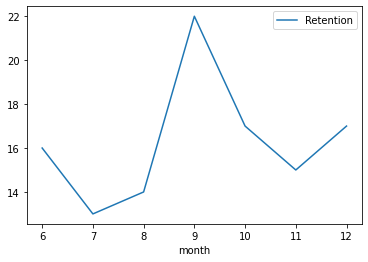

In [155]:
#Retention rate per month
retention.plot(x="Month", y=["Retention"], kind="line",label='Retention')
plt.legend()
plt.show()